In [17]:
import importlib
import matplotlib.pyplot as plt

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.plot_utils
importlib.reload(mysklearn.plot_utils)
import mysklearn.plot_utils as plot_utils

import mysklearn.myskutils
importlib.reload(mysklearn.myskutils)
import mysklearn.myskutils as myskutils

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MySimpleLinearRegressor, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyDecisionTreeClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import copy

# Indonesian Contraceptive Choice

In [6]:
cont_data_fname = os.path.join("input_data", "contraception_data.csv")
header1,table1 = myutils.create_data(cont_data_fname)
data = MyPyTable(data=table1, column_names=header1)
data.convert_to_numeric()


In [7]:
for i in range(len(data.data)):
    if (data.data[i][9] == 1):
        data.data[i][9] = "no use"
    elif (data.data[i][9] == 2):
        data.data[i][9] = "long-term"
    else:
        data.data[i][9] = "short-term"

    

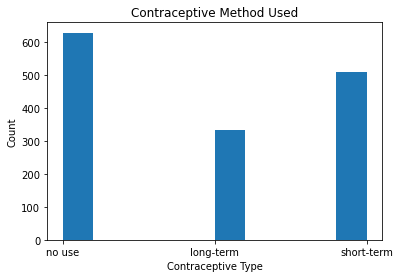

In [8]:
method_used = data.get_column("contraceptive method used")
plot_utils.histogram(method_used, "Count", "Contraceptive Type", "Contraceptive Method Used", 3)


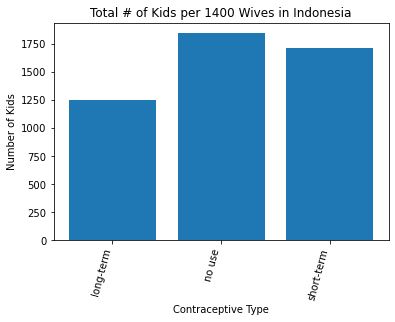

In [9]:
children_born = data.get_column("number of children")
group_names, group_subtables = myutils.group_by(data.data, 9)
sums = []
for i in range(len(group_subtables)):
    col = myutils.get_column(group_subtables[i], 3)
    nums = sum(col)
    sums.append(nums)

plot_utils.bar_chart2(group_names,sums,"Number of Kids","Contraceptive Type","Total # of Kids per 1400 Wives in Indonesia")



    



## Creating X_train and y_train

In [10]:
X_train = []
y_train = []
for i in range(len(data.data)):
    a_list = []
    a_list.append(data.data[i][0]) # high coorelation
    a_list.append(data.data[i][1]) # high coorelation
    a_list.append(data.data[i][2])
    a_list.append(data.data[i][3]) #high coorelation
    #a_list.append(data.data[i][4])
    #a_list.append(data.data[i][5])
    a_list.append(data.data[i][6]) # high coorelation
    #a_list.append(data.data[i][7])
    #a_list.append(data.data[i][8])
    X_train.append(a_list)
    y_train.append(data.data[i][9])



In [11]:
knn_classifier = MyKNeighborsClassifier()


In [12]:
X_train_folds, X_test_folds = myevaluation.stratified_kfold_cross_validation(X_train,y_train, n_splits=10)
X_train = []
y_train = []
X_train = []
y_train = []
for i in range(len(data.data)):
    a_list = []
    a_list.append(data.data[i][0]) # high coorelation
    a_list.append(data.data[i][1]) # high coorelation
    a_list.append(data.data[i][2]) # high coorelation
    a_list.append(data.data[i][3]) # high coorelation
    #a_list.append(data.data[i][4])
    #a_list.append(data.data[i][5])
    a_list.append(data.data[i][6]) # high coorelation
    #a_list.append(data.data[i][7])
    #a_list.append(data.data[i][8])
    X_train.append(a_list)
    y_train.append(data.data[i][9])
k_strat_y_predicted, k_strat_y_test = myskutils.perform_cross_validation(X_train, X_train_folds, X_test_folds, y_train, knn_classifier)
acc = myskutils.get_accuracy(k_strat_y_predicted, k_strat_y_test)
print(acc)

0.49762389680923286


## Naive Bayes Classification

In [33]:
bayes = MyNaiveBayesClassifier()

In [34]:
y = []
X = []
for instance in data.data:
    y.append(instance[-1])
    X.append(instance[0:-1])

In [35]:
X_train, X_test, y_train, y_test = myevaluation.train_test_split(X, y, test_size=0.33, random_state=None, shuffle=True)

In [36]:
bayes.fit(X_train, y_train)
predictions = bayes.predict(X_test) 

In [39]:
accuracy = myskutils.get_accuracy(predictions, y_test)
print("Naive Bayes Classification Accuracy:", accuracy) 

Naive Bayes Classification Accuracy: 0.48254620123203285


## Additional Exploratory Data Analysis

### Pie Charts: Comparing Contraceptive Method Distributions Depending on Standard of Living Index

In [44]:
group_names, group_subtables = myutils.group_by(data.data, -3)

In [51]:
print(group_names)

[1.0, 2.0, 3.0, 4.0]


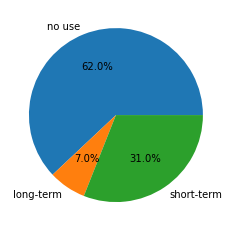

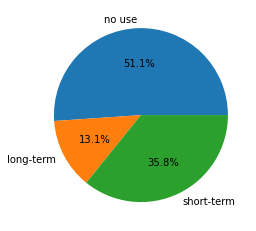

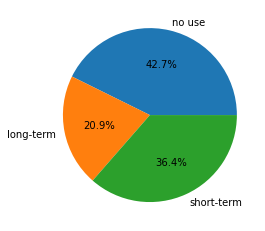

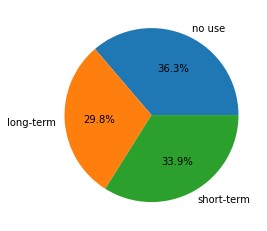

In [50]:
labels = ["no use", "long-term", "short-term"]
for group in group_subtables:
    counts = [0, 0, 0]
    for instance in group:
        if instance[-1] == "no use":
            counts[0] += 1
        if instance[-1] == "long-term":
            counts[1] += 1
        if instance[-1] == "short-term":
            counts[2] += 1
    plot_utils.pie_chart(labels, counts)

### Notes

As the standard of living index increases, the percentage of "no use" contraceptive methods decreases, while the "long-term" contraceptive method percentage increases.